In [42]:
import numpy as np
import pandas
import scipy.stats
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [43]:
data = pandas.read_csv('marketing_data.csv',keep_default_na=False,na_values=[" "], low_memory=False)

In [44]:
# convert to numeric format
data['youtube'] = pandas.to_numeric(data['youtube'], errors='coerce')
data['facebook'] = pandas.to_numeric(data['facebook'], errors='coerce')
data['newspaper'] = pandas.to_numeric(data['newspaper'], errors='coerce')
data['sales'] = pandas.to_numeric(data['sales'], errors='coerce')

Text(0, 0.5, 'sales')

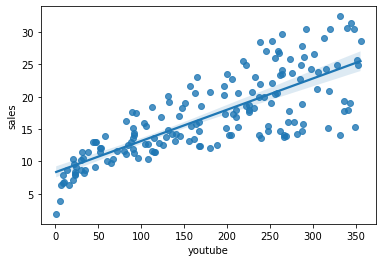

In [45]:
# first order (linear) scatterplot
scat1 = seaborn.regplot(x="youtube", y="sales", scatter=True, data=data)
plt.xlabel('youtube')
plt.ylabel('sales')

From the graph,we see that a positive linear relationship exists between youtube and sales.But we can see that it is against one of the linear assumptions,Homoscedasticity.That is,this plot represents Heteroscedasticity,the spread of residual values increases as we move along the x axis,youtube.

Text(0, 0.5, 'sales')

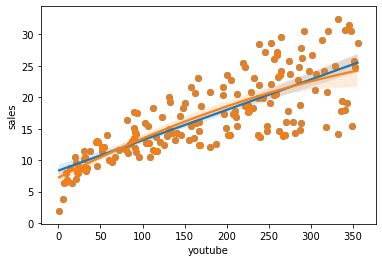

In [46]:
# first order (linear) scatterplot
scat2 = seaborn.regplot(x="youtube", y="sales", scatter=True, data=data)
plt.xlabel('youtube')
plt.ylabel('sales')
# fit second order polynomial
# run the 2 scatterplots together to get both linear and second order fit lines
scat2 = seaborn.regplot(x="youtube", y="sales", scatter=True, order=2, data=data)
plt.xlabel('youtube')
plt.ylabel('sales')

Based on looking at two curves(linear and quadratic),the linear curve fits the data better than the quadratic one.

We can examine the relationship between explanatory variable of interest and response variable when all other explanatory variables are held constant.This can be achieved by centering the value of explanatory variable from its mean value, in case of having quantitative explanatory variables.

In [47]:
# center quantitative IVs for regression analysis
data['facebook_c'] = (data['facebook'] - data['facebook'].mean())
data['youtube_c'] = (data['youtube'] - data['youtube'].mean())
data['news_c'] = (data['newspaper'] - data['newspaper'].mean())
data[["facebook_c", "news_c","youtube_c"]].describe()

,facebook_c,news_c,youtube_c
count,1.710000e+02,1.710000e+02,1.710000e+02
mean,8.310441e-16,-1.828297e-15,2.227198e-14
std,1.791353e+01,2.490292e+01,1.024496e+02
min,-2.767158e+01,-3.488000e+01,-1.771811e+02
25%,-1.597158e+01,-2.150000e+01,-8.694105e+01
50%,-9.115789e-01,-4.160000e+00,1.738947e+00
75%,1.600842e+01,1.564000e+01,8.495895e+01
max,3.184842e+01,8.584000e+01,1.776589e+02


In [48]:
# linear regression analysis
reg1 = smf.ols('sales ~ youtube_c', data=data).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.55e-36
Time:                        23:26:15   Log-Likelihood:                -476.41
No. Observations:                 171   AIC:                             956.8
Df Residuals:                     169   BIC:                             963.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9228      0.302     56.064      0.0

From the output,we can find the f value is 266.1 and a significant p value(p<0.05) indicating that youtube and sales are associated with a positive beta coefficient of 0.0482.From the beta coefficient  and intercept value,we can form an equation of best fit line.
                                    sales = 0.0482 * youtube_c +16.9228
By knowing the value of explanatory variable(youtube),we can predict the expected response variable(sales).
The R-square value is 0.612 indicating that the linear association is capturing about 61% of variability in the sales.

In [49]:
#quadratic regression analysis 
reg2 = smf.ols('sales ~ youtube_c + I(youtube_c**2)', data=data).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     136.2
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           6.98e-36
Time:                        23:35:57   Log-Likelihood:                -474.87
No. Observations:                 171   AIC:                             955.7
Df Residuals:                     168   BIC:                             965.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            17.5068      0.44

After adding the quadratic term,we see from the output is that,linear association between youtube_c and sales is significant with a positive p-value within the confidence intervals and quadratic association between the two variables is not significant as p-value greater than alpha. Thus the best fitting line for the association  is linear.

In [50]:
#adding more explanatory variables
reg3 = smf.ols('sales ~ youtube_c + I(youtube_c**2) + facebook_c + news_c', 
               data=data).fit()
print (reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     471.4
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           1.80e-89
Time:                        23:45:39   Log-Likelihood:                -342.29
No. Observations:                 171   AIC:                             694.6
Df Residuals:                     166   BIC:                             710.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            17.8832      0.20

The other centered explanatory variables are also added to this model in order to evaluate multiple predictors over quantitative response variable. We can see that except newspaper , the other variables such as youtube and facebook are significantly associated with sales as p-value is less than 0.05.

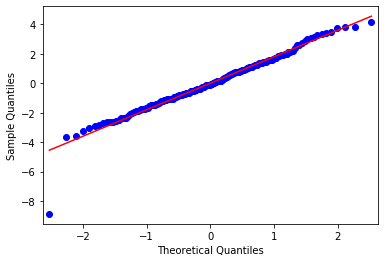

In [34]:
#Q-Q plot for normality
fig1=sm.qqplot(reg3.resid, line='r')

A Q-Q plot plots the quantiles of the residuals that we would theoretically see if the residuals followed a normal distribution against the quantiles of the residuals estimated from our regression model. Since almost all the points follow a straight line, the residuals are normally distributed.

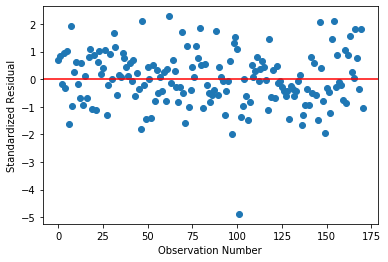

In [35]:
# simple plot of residuals
stdres=pandas.DataFrame(reg3.resid_pearson)
fig2=plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
print(fig2)

Here only 4.67% of the observation has standardized residuals for an absolute value greater than or equal to two. This suggests that fit of the model is good.

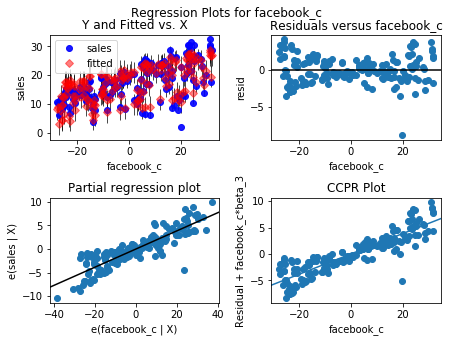

In [36]:
# additional regression diagnostic plots
fig3 = plt.figure(figsize=(6.4,4.8))
fig3 = sm.graphics.plot_regress_exog(reg3,  "facebook_c",fig=fig3)

Partial regression plot shows a relationship between the response variable and the specific explanatory variable after controlling for the other explanatory variables. Here the variable facebook shows a linear relationship to the response variable. Thus it meets the linearity assumption in the multiple regression.

Figure(432x288)


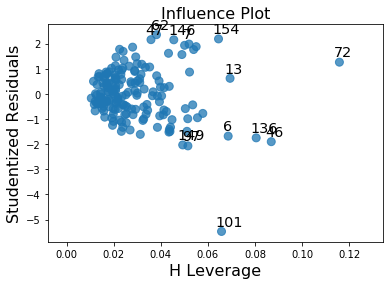

In [37]:
# leverage plot
fig4=sm.graphics.influence_plot(reg3, size=8)
print(fig4)

Outliers are observations with residual values greater than two or less than negative two. This plot tells us that these outliers are small close to zero leverage values, do not have strong influence on the regression parameter

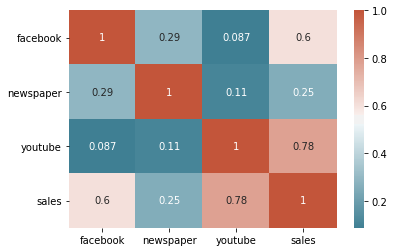

In [40]:
# heatmap with correlation coefficient value
corr = data[["facebook", "newspaper","youtube","sales"]].corr()
seaborn.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap=seaborn.diverging_palette(220,20,as_cmap=True))

From the heat map we can see that there is a strong correlation between youtube and sales(0.78), a moderate correlation between facebook and sales (0.6) and a weak correlation between newspaper and sales(0.25).

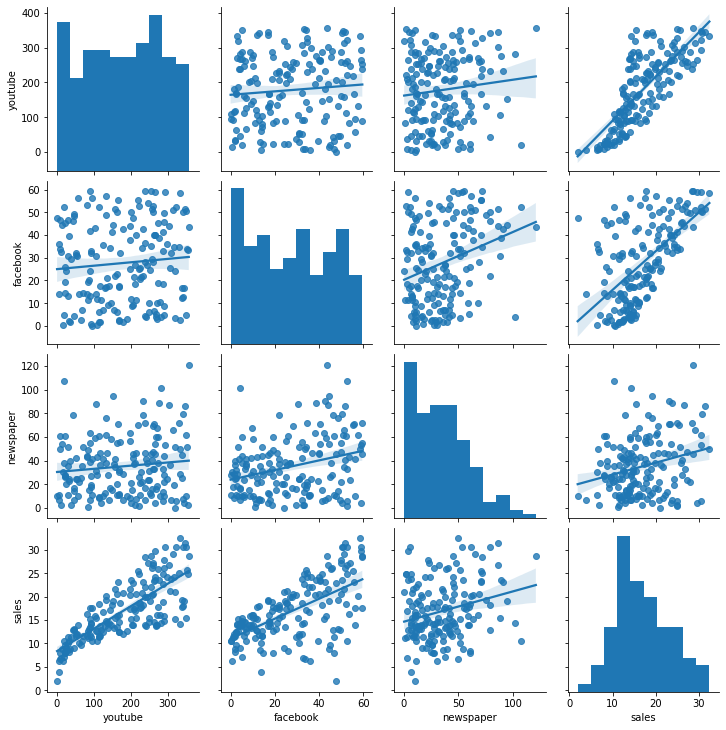

In [41]:
# pairplot of variables
seaborn.pairplot(data,vars=["youtube","facebook","newspaper","sales"],kind="reg")

This pairplot shows a strong relationship between youtube and sales, less for facebook and even less for newspaper.

We can conclude that youtube is positively associated with sales after controlling for facebook and newspaper. A positive linear relationship was found between youtube and sales. Thus investing in youtube yields a higher return of investment than in facebook and newspaper.